In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import preprocessing, model_selection, neighbors, discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
file = ("glass.data")
df = pd.read_csv(file,delim_whitespace=False, header=None)
columns = ["Id", "Ri", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
df.columns = columns 

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
normalized = min_max_scaler.fit_transform(df)

In [4]:
normalized_df = pd.DataFrame(normalized, columns=df.columns)

In [5]:
original_df=normalized_df

Αφαιρώ τα ουτλιέρς

In [6]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(normalized_df))
threshold = 3.5
outliers = np.where(z_scores > threshold)
normalized_df = normalized_df[(z_scores <= threshold).all(axis=1)]

Τσεκάρω αν ο Fe ειναι μέ άδειες τιμές. 

In [7]:
import pandas as pd
if normalized_df["Fe"].all() == 0:
  print('The "Fe" column is filled with zero values')
else:
  print('The "Fe" column is not filled with zero values')


The "Fe" column is filled with zero values


In [8]:
col = [ "Ri", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba"] 
df_new = normalized_df.loc[:,col] 
original_df = original_df.loc[:,col] 
target=df["Type"]

In [9]:
df_new

,Ri,Na,Mg,Al,Si,K,Ca,Ba
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000
...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413


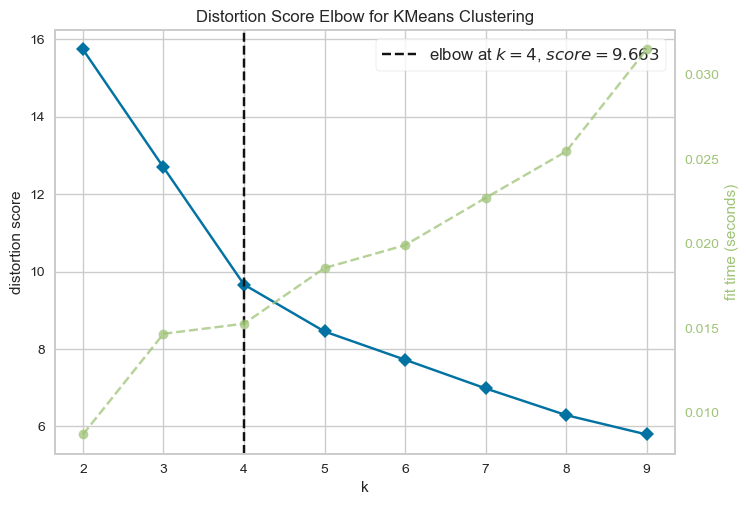

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
kmeans = KMeans()
kmeans.fit(df_new)
visualizer = KElbowVisualizer(kmeans, k=(2,10),locate_elbow=True)
visualizer.fit(df_new)
visualizer.show()


Αυτό δέν το χρησιμοποιώ είναι για τα δεδομένα που δέν έχουν φιλτραριστεί. 

Η παράμετρος k στο αντικείμενο KElbowVisualizer καθορίζει το εύρος των πιθανών τιμών για το k στο μοντέλο KMeans και η μέθοδος προσαρμογής εκπαιδεύει τον οπτικοποιητή στα δεδομένα.Η μέθοδος show εμφανίζει το KElbow,που βρίσκεις την βέλτιστη τιμή για το k εντοπίζοντας το σημείο του "αγκώνα" στο γράφημα.

Απο εδώ βλέπουμε και το σιλουέτε οτι βγάζει πάροιμοια αποτελέσματα για το βέλτιστο Κ 

For n_clusters=2, The Silhouette Coefficient is 0.6208320042506327
For n_clusters=3, The Silhouette Coefficient is 0.5968001117226399
For n_clusters=4, The Silhouette Coefficient is 0.45380602961702887
For n_clusters=5, The Silhouette Coefficient is 0.4645051439135838
For n_clusters=6, The Silhouette Coefficient is 0.4252690570218889
For n_clusters=7, The Silhouette Coefficient is 0.31931182623281745
For n_clusters=8, The Silhouette Coefficient is 0.2918059118410597


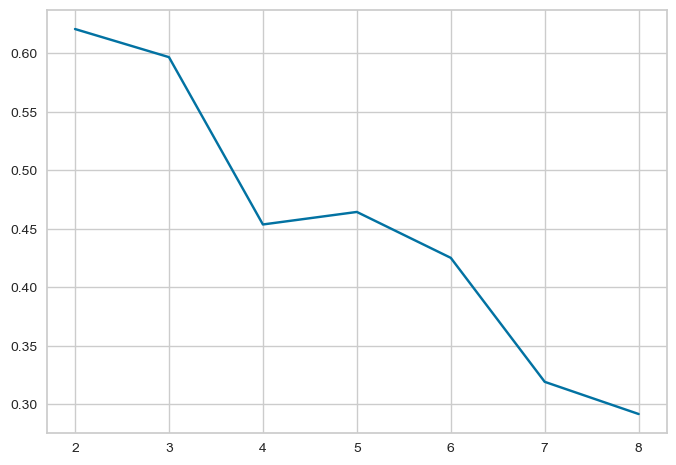

In [11]:
sse_ = []

for k in range (2,9):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_new)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_new, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k,
sil_coeff))
    sse_.append([k, silhouette_score(df_new, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

/Users/georgepsaltakis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


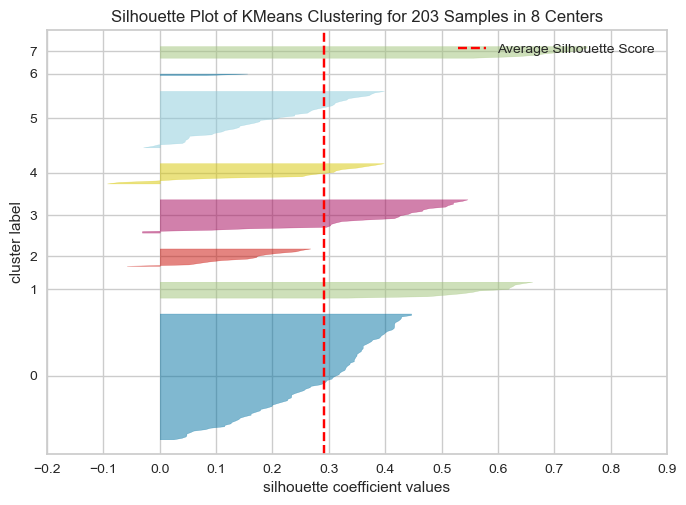

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 203 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_new)
visualizer.show()

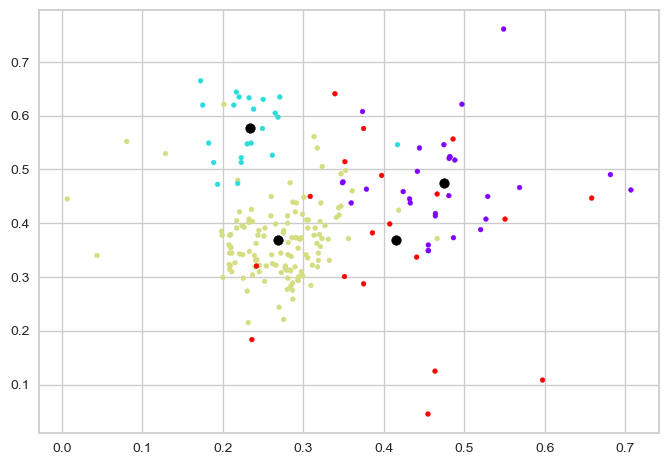

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_new)
labels = kmeans.predict(df_new)
plt.scatter(df_new['Ri'], df_new['Na'], c=labels,s=12, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

In [14]:
kmeans.cluster_centers_

array([[0.47436348, 0.47418546, 0.78500371, 0.19875389, 0.33952381,
        0.03011272, 0.38320942, 0.02783069],
       [0.23399713, 0.57634997, 0.01801984, 0.61653922, 0.60892857,
        0.00314742, 0.30825448, 0.32871573],
       [0.2684206 , 0.36786284, 0.76562395, 0.34435476, 0.53367154,
        0.09092129, 0.27519855, 0.00860991],
       [0.41504552, 0.36952909, 0.10444262, 0.37006067, 0.5593985 ,
        0.07432833, 0.54221287, 0.        ]])

In [15]:
kmeans.labels_

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2,
       2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

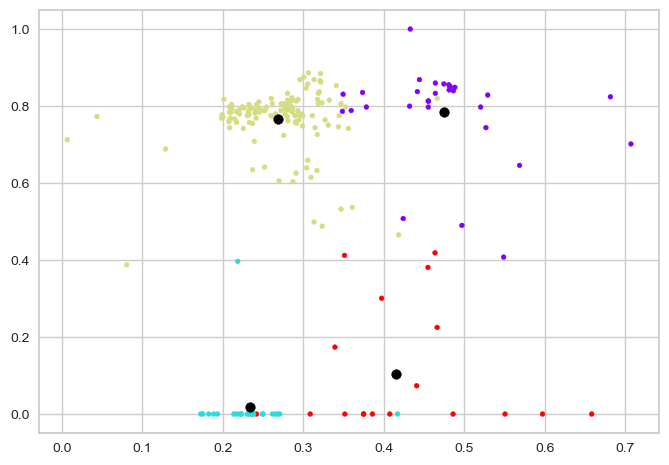

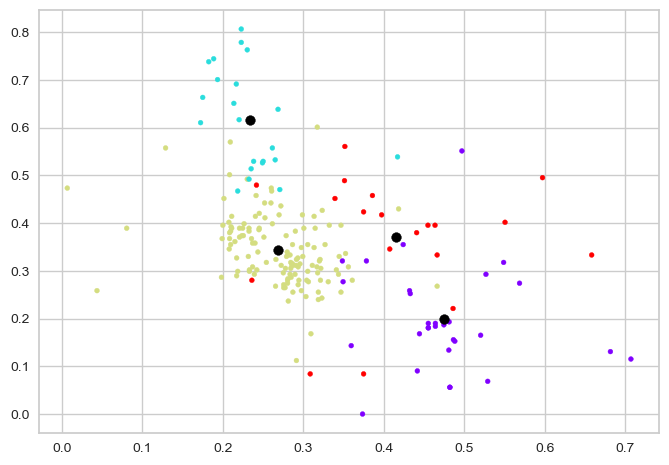

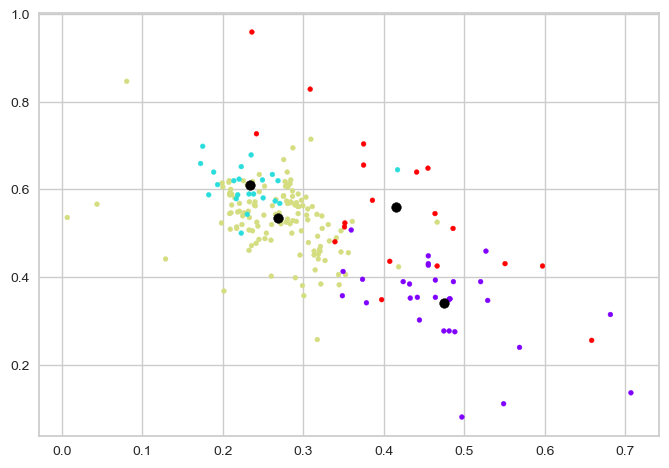

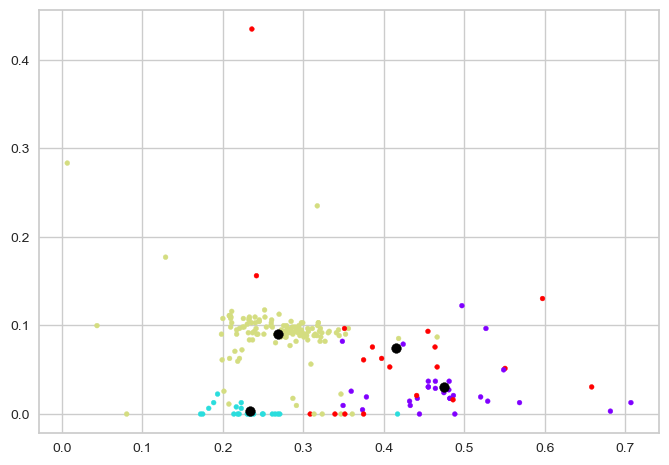

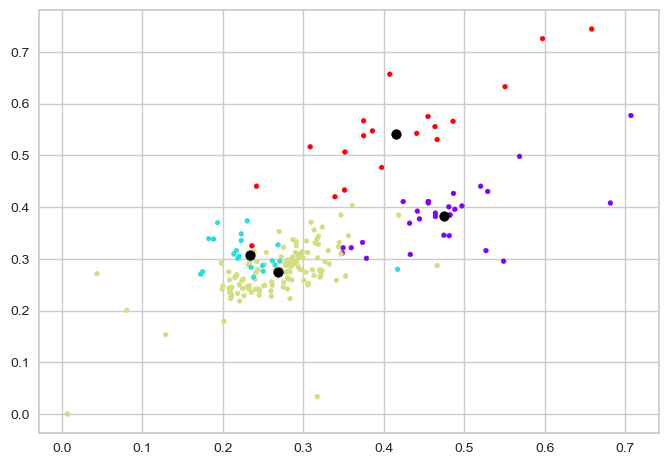

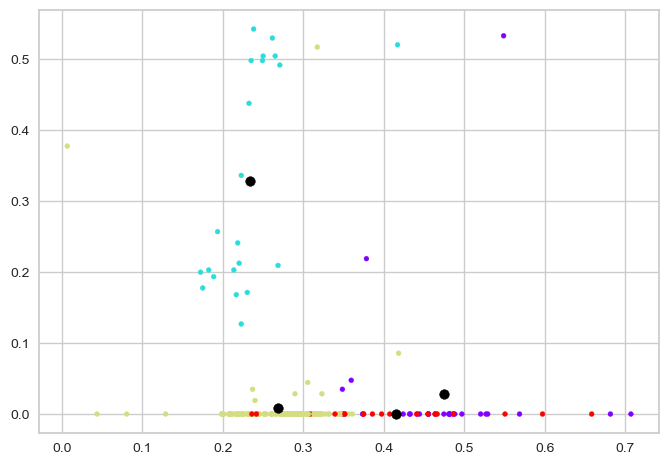

In [16]:
plt.scatter(df_new["Ri"], df_new["Mg"], c=kmeans.labels_,s=12, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,2], color='black')
plt.show()

plt.scatter(df_new["Ri"], df_new["Al"], c=kmeans.labels_,s=12, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,3], color='black')
plt.show()

plt.scatter(df_new["Ri"], df_new["Si"], c=kmeans.labels_,s=12, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,4], color='black')
plt.show()

plt.scatter(df_new["Ri"], df_new["K"], c=kmeans.labels_,s=12, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,5], color='black')
plt.show()

plt.scatter(df_new["Ri"], df_new["Ca"], c=kmeans.labels_,s=12, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,6], color='black')
plt.show()

plt.scatter(df_new["Ri"], df_new["Ba"], c=kmeans.labels_,s=12, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,7], color='black')
plt.show()


Ο συντελεστής inconsistency είναι ένα μέτρο της αστάθειας της ομαδοποίησης κατά τη χρήση ιεραρχικής ομαδοποίησης με τη μέθοδο μονής σύνδεσης. Ορίζεται ως η μέγιστη διαφορά στις αποστάσεις μεταξύ ζευγών παρατηρήσεων στην ίδια συστάδα σε διαφορετικά επίπεδα της ιεραρχίας. Ένας υψηλότερος συντελεστής inconsistency υποδηλώνει ότι η ομαδοποίηση είναι πιο ασταθής και μπορεί να είναι λιγότερο αξιόπιστη.

In [17]:
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import linkage

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='single')
labels = model.fit_predict(df_new)
linkage = linkage(df_new, 'single')
inconsistency_single = inconsistent(linkage)
inconsistency_single
average_inconsistency_single = np.mean(inconsistency_single)
print(average_inconsistency_single)


0.666191030608261


In [18]:
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import linkage

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='single')
labels = model.fit_predict(kmeans.cluster_centers_)
linkage = linkage(kmeans.cluster_centers_, 'single')
inconsistency_single = inconsistent(linkage)
inconsistency_single
average_inconsistency_single = np.mean(inconsistency_single)
print(average_inconsistency_single)

0.6352609250147871


In [19]:
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import linkage

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')
labels = model.fit_predict(df_new)
linkage = linkage(df_new, 'complete')
inconsistency_complete = inconsistent(linkage)
average_inconsistency_complete = np.mean(inconsistency_complete)
print(average_inconsistency_complete)

0.684978991132951


In [20]:

from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import linkage

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')
labels = model.fit_predict(kmeans.cluster_centers_)
linkage = linkage(kmeans.cluster_centers_, 'complete')
inconsistency_complete = inconsistent(linkage)
average_inconsistency_complete = np.mean(inconsistency_complete)
print(average_inconsistency_complete)

0.6654861664823116


In [21]:
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import linkage

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='average')
labels = model.fit_predict(df_new)
linkage = linkage(df_new, 'average')
inconsistency_average = inconsistent(linkage)
average_inconsistency_average = np.mean(inconsistency_average)
print(average_inconsistency_average)

0.6758176809050571


In [22]:
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import linkage

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='average')
labels = model.fit_predict(kmeans.cluster_centers_)
linkage = linkage(kmeans.cluster_centers_, 'average')
inconsistency_average = inconsistent(linkage)
average_inconsistency_average = np.mean(inconsistency_average)
print(average_inconsistency_average)

0.6504011844253529


In [23]:
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import linkage

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
labels = model.fit_predict(df_new)
linkage = linkage(df_new, 'ward')
inconsistency_ward = inconsistent(linkage)
average_inconsistency_ward = np.mean(inconsistency_ward)
print(average_inconsistency_ward)

0.7022054214191965


In [24]:
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import linkage

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
labels = model.fit_predict(kmeans.cluster_centers_)
linkage = linkage(kmeans.cluster_centers_, 'ward')
inconsistency_ward = inconsistent(linkage)
average_inconsistency_ward = np.mean(inconsistency_ward)
print(average_inconsistency_ward)

0.6750248702342097


In [25]:
if average_inconsistency_single < average_inconsistency_complete and average_inconsistency_single < average_inconsistency_average and average_inconsistency_single < average_inconsistency_ward:
    print("The single linkage model is generating the best clusters.")
elif average_inconsistency_complete < average_inconsistency_single and average_inconsistency_complete < average_inconsistency_average and average_inconsistency_complete < average_inconsistency_ward:
    print("The complete linkage model is generating the best clusters.")
elif average_inconsistency_average < average_inconsistency_single and average_inconsistency_average < average_inconsistency_complete and average_inconsistency_average < average_inconsistency_ward:
    print("The average linkage model is generating the best clusters.")
else:    
    print("The Ward linkage model is generating the best clusters.")

The single linkage model is generating the best clusters.


Για να προσδιοριστεί ποιο μοντέλο ομαδοποίησης θα παράγει ένα καλύτερο δενδρόγραμμα, μπορούμε να συγκρίνουμε τους μέσους συντελεστές inconsistency για κάθε μοντέλο και να επιλέξουμε το μοντέλο με τον χαμηλότερο μέσο συντελεστή inconsistency Επομένως, ένα μοντέλο με χαμηλότερο μέσο συντελεστή inconsistency είναι πιθανό να παράγει ένα δενδρόγραμμα

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import preprocessing, model_selection, neighbors, discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

single linkage dendrogram


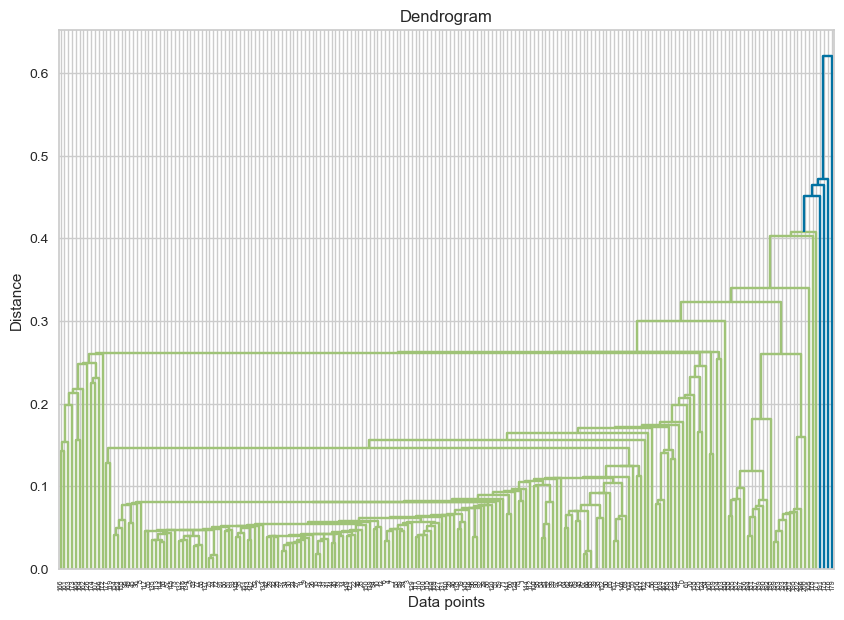

In [27]:
np.set_printoptions(precision=4,suppress=True)

linked = linkage(df_new, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()  


complete linkage dendrogram


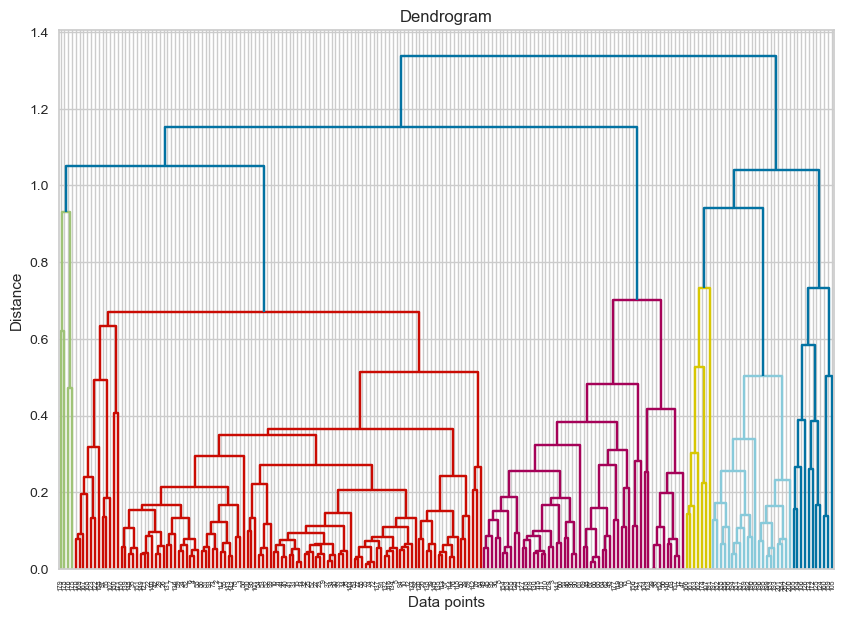

In [28]:
linked = linkage(df_new, 'complete')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
             orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()  

average linkage dendrogram


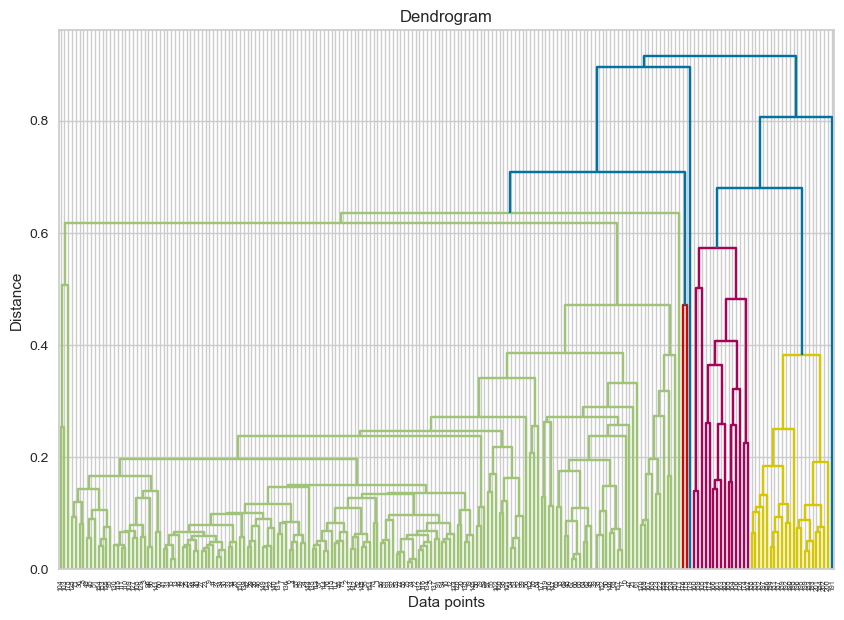

In [29]:
linked = linkage(df_new, 'average')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()  


Centroid Method Dendrogram


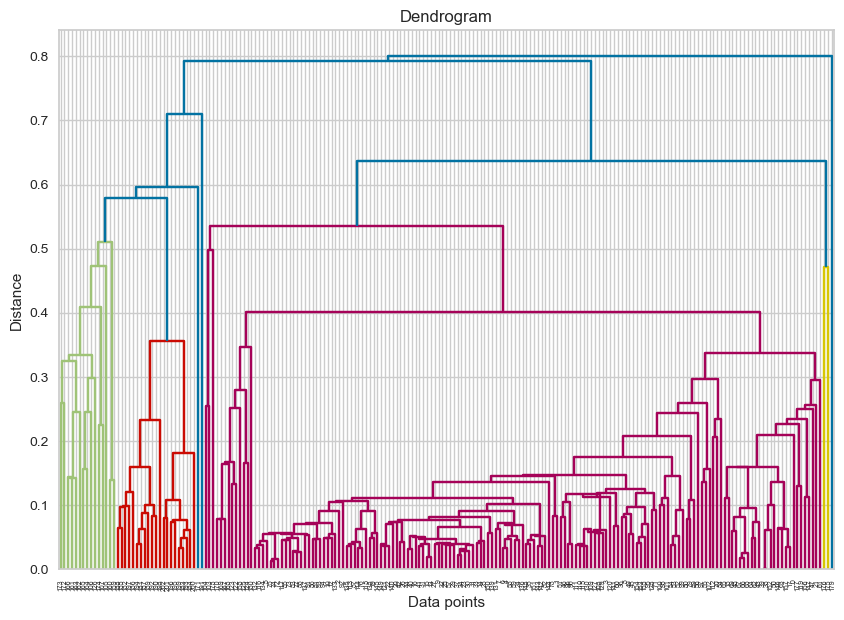

In [30]:
linked = linkage(df_new, 'centroid')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()  

ward linkage dendrogram


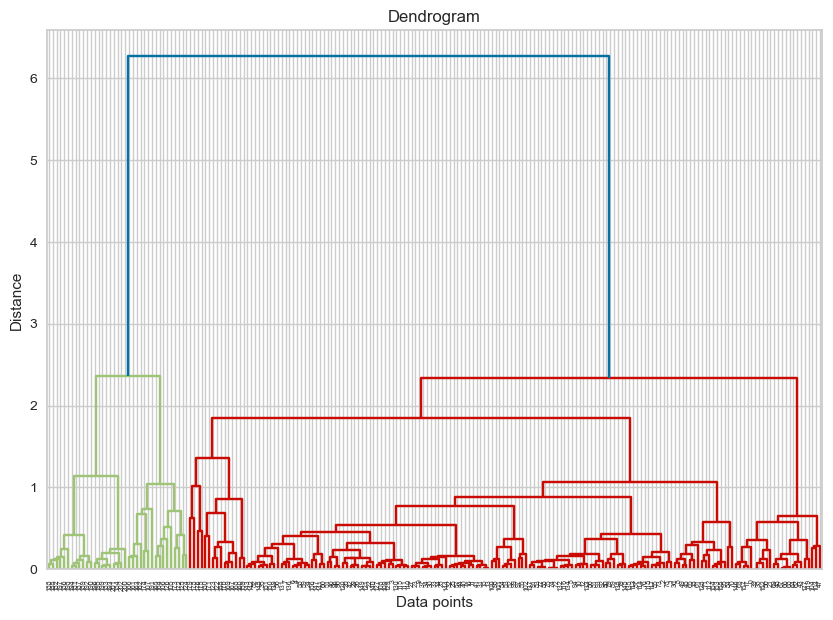

In [31]:
linked = linkage(df_new, 'ward')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()  